In [4]:
import numpy as np 
import pandas as pd 
from IPython.display import Markdown
from datetime import timedelta
import json, requests
from datetime import datetime
import glob
import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import altair as alt
%matplotlib inline
import seaborn as sns
sns.set()

import plotly.offline as py
import plotly.express as ex
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)

plt.style.use("seaborn-talk")
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

pd.set_option('display.max_rows', None)
from math import sin, cos, sqrt, atan2, radians
import warnings
warnings.filterwarnings("ignore")

In [5]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))

In [71]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             x="percentage", y="symptom", color='symptom',color_discrete_sequence = ex.colors.cyclical.IceFire,
              title='Symptom of Coronavirus',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')


fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Symptoms',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()

In [7]:
%%HTML
<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2061549" 
data-url="https://flo.uri.sh/visualisation/2061549/embed">
<script src="https://public.flourish.studio/resources/embed.js"></script></div>

In [8]:
data= pd.read_csv("Desktop/data.csv")
data.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_city_pt,detected_district,detected_state,nationality,current_status,status_change_date,notes,current_location,current_location_pt,contacts
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),[]
1,2,2,KL-AL-P1,2020-02-02,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),[]
2,3,3,KL-KS-P1,2020-02-03,NaN,Unknown,Kasaragod,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,2020-02-14,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),[]
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,2020-03-15,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),"[22,23,24,25,26,27,47]"
4,5,5,TS-P1,2020-03-02,24.0,Male,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,2020-03-02,".\nTravel history to Dubai, Singapore contact",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),[]


In [9]:
entities = ['schools & other educational organization shutdown','public places shutdown',
            'work from home started for employees','country under lockdown','current situation']
dates = ['2020-03-10','2020-03-13','2020-03-16','2020-03-21','2020-03-26']

In [10]:
data = data.sort_values(by="diagnosed_date")

In [11]:
mask1 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-09') #before school lockdown
mask1 = len(data.loc[mask1])
mask2 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-12') #before public place shutdown
mask2 = len(data.loc[mask2])
mask3 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-15') #before work from home
mask3 = len(data.loc[mask3])
mask4 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-21') #before lockdown
mask4 = len(data.loc[mask4])
mask5 = (data['diagnosed_date'] > '2020-01-30') & (data['diagnosed_date'] <= '2020-03-26') #before lockdown
mask5 = len(data.loc[mask5])

In [12]:
case_counts = [mask1, mask2,mask3,mask4,mask5]
plot_data = pd.DataFrame({'dates':dates,'counts':case_counts,'entities': entities})
plot_data

,dates,counts,entities
0,2020-03-10,47,schools & other educational organization shutdown
1,2020-03-13,81,public places shutdown
2,2020-03-16,112,work from home started for employees
3,2020-03-21,333,country under lockdown
4,2020-03-26,734,current situation


In [13]:
plot_data['dates'] = pd.to_datetime(plot_data['dates'])

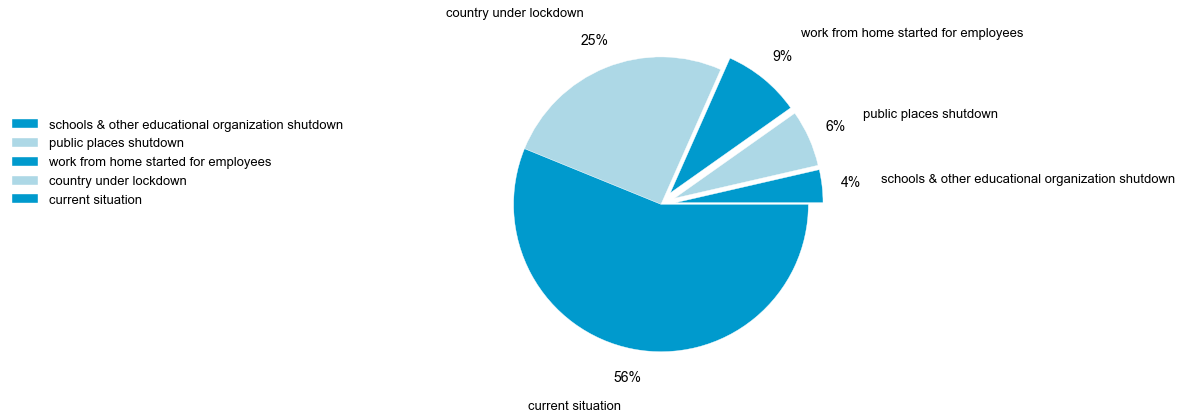

In [14]:
fig, ax = plt.subplots(figsize = (10,6))
labels = entities
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
percentages = case_counts
explode=(0.1,0.1,0.1,0,0)
ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(0.0,0.8))

Text(0.5, 0, 'Covid19 Case Count')

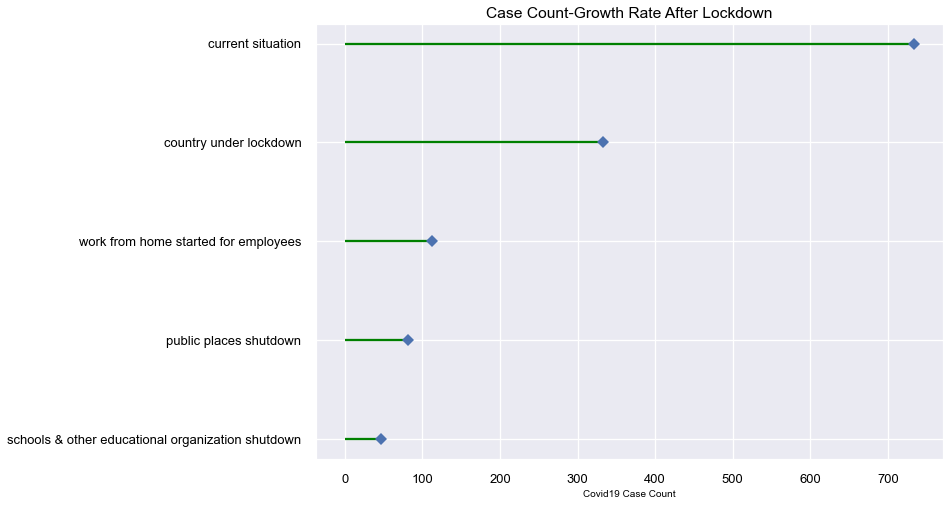

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hlines(y=plot_data.entities, xmin=0, xmax=plot_data.counts, color='green')
plt.plot(plot_data.counts, plot_data.entities, "D")
# Add titles and axis names
ax.xaxis.label.set_color('black')
plt.yticks(plot_data.entities)
plt.title("Case Count-Growth Rate After Lockdown")
plt.xlabel('Covid19 Case Count', fontsize=10)

In [20]:
ageGroupDetails = pd.read_csv("Desktop/Covid-19/AgeGroupDetails.csv")
hospitalBedDetails = pd.read_csv("Desktop/Covid-19/HospitalBedsIndia.csv")
ICMRTestingLabs = pd.read_csv("Desktop/Covid-19/ICMRTestingLabs.csv")
individualDetails = pd.read_csv("Desktop/Covid-19/IndividualDetails.csv")
statewiseTestingDetails = pd.read_csv("Desktop/Covid-19/StatewiseTestingDetails.csv")
covid19India = pd.read_csv("Desktop/Covid-19/covid_19_india.csv")
populationIndiaCensus2011 = pd.read_csv("Desktop/Covid-19/population_india_census2011.csv")

In [ ]:
AGE WISE ANALYSIS

In [24]:
fig = px.pie(ageGroupDetails,values=ageGroupDetails.TotalCases,names=ageGroupDetails.AgeGroup,
             title='Total Cases-Age wise distribution in India',
            color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

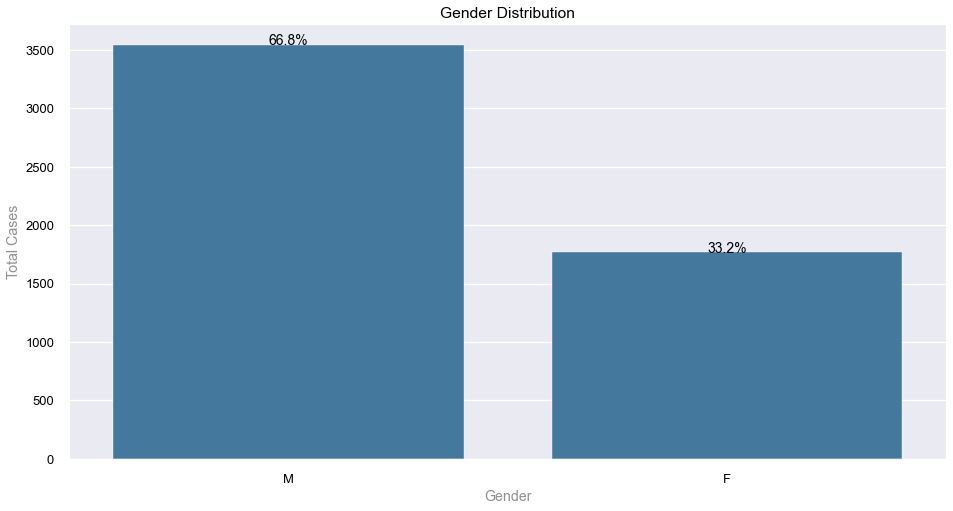

In [28]:
plt.figure(figsize=(14,8))
sns.countplot(data=individualDetails,x='gender',order=individualDetails['gender'].value_counts().index,color=sns.color_palette("Blues_d")[2])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Cases')
order2 = individualDetails['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / individualDetails.gender.dropna().count() )
    plt.text(i,count+2,strt,ha='center')

In [ ]:
CASES IN INDIA

In [29]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
df1=covid19India.groupby('Date').sum()
df1.reset_index(inplace=True)

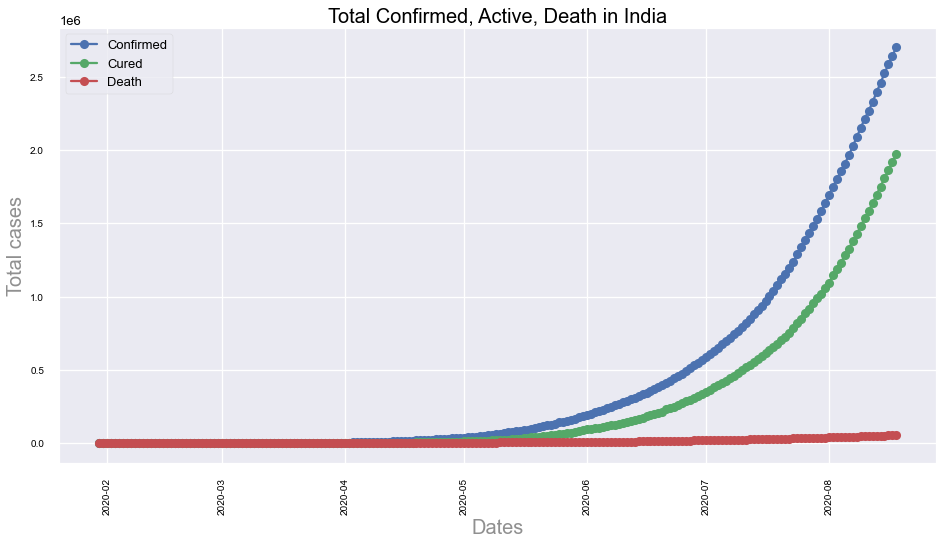

In [34]:
plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel("Total cases",fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend();


In [64]:
fig = px.bar(populationIndiaCensus2011, x = "State / Union Territory", y = ["Rural population", "Urban population"], title = "India Population state/union territory wise")
fig.show()

In [65]:
state_cases=covid19India.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,604358,20265,428514,196109,3.350000,70.900000
32,Tamil Nadu,343945,5886,283937,65894,1.710000,82.550000
1,Andhra Pradesh,296609,2732,209100,90241,0.920000,70.500000
18,Karnataka,233283,4062,148562,88783,1.740000,63.680000
39,Uttar Pradesh,158216,2515,104808,55923,1.590000,66.240000
11,Delhi,153367,4214,138301,19280,2.750000,90.180000
41,West Bengal,119578,2473,89703,32348,2.070000,75.020000
4,Bihar,106307,468,76452,30323,0.440000,71.920000
35,Telengana,93937,711,72202,22446,0.760000,76.860000
13,Gujarat,79710,2800,62595,19915,3.510000,78.530000


In [68]:
statewiseTestingDetails["TotalSamples"] = statewiseTestingDetails["TotalSamples"].fillna(0)
statewiseTestingDetails["Negative"] = statewiseTestingDetails["Negative"].fillna(0)
statewiseTestingDetails["Positive"] = statewiseTestingDetails["Positive"].fillna(0)

statewiseTestingDetails.tail(10)

,Date,State,TotalSamples,Negative,Positive
4245,2020-08-08,West Bengal,1079657.0,0,92615.0
4246,2020-08-09,West Bengal,1105899.0,0,95554.0
4247,2020-08-10,West Bengal,1132196.0,0,98459.0
4248,2020-08-11,West Bengal,1159211.0,0,0.0
4249,2020-08-12,West Bengal,1186923.0,0,0.0
4250,2020-08-13,West Bengal,1216955.0,0,107323.0
4251,2020-08-14,West Bengal,1248272.0,0,110358.0
4252,2020-08-15,West Bengal,1282486.0,0,113432.0
4253,2020-08-16,West Bengal,1314772.0,0,116498.0
4254,2020-08-17,West Bengal,1347091.0,0,119578.0


In [ ]:
TESTING AND HEALTHCARE INSIGHTS

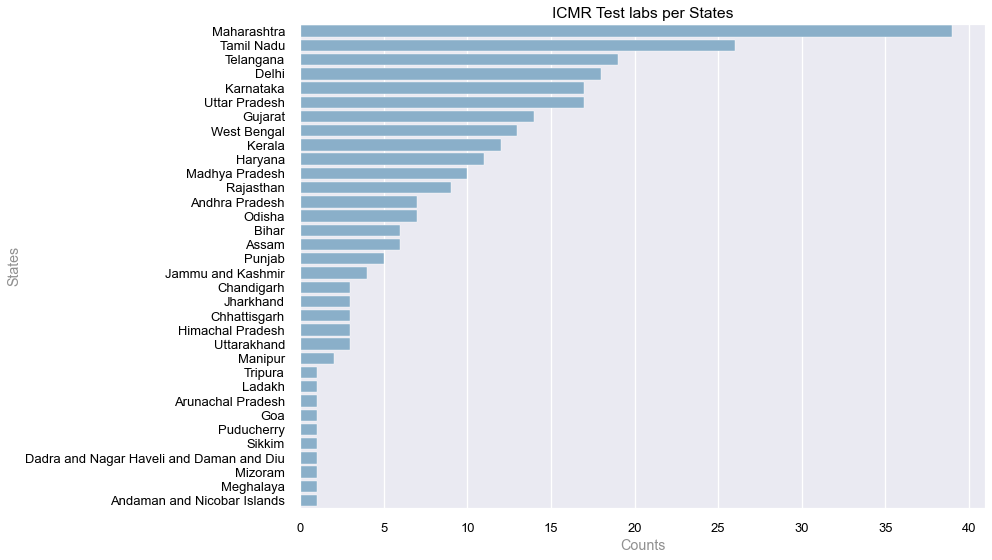

In [53]:
state=list(ICMRTestingLabs['state'].value_counts().index)
count=list(ICMRTestingLabs['state'].value_counts())
plt.figure(figsize=(14,8))
sns.barplot(x=count,y=state,color=sns.color_palette('Set3')[4])
plt.xlabel('Counts')
plt.ylabel('States')
plt.title('ICMR Test labs per States')
plt.tight_layout()

In [56]:
hospitalBedDetails.drop(labels=36,inplace=True)

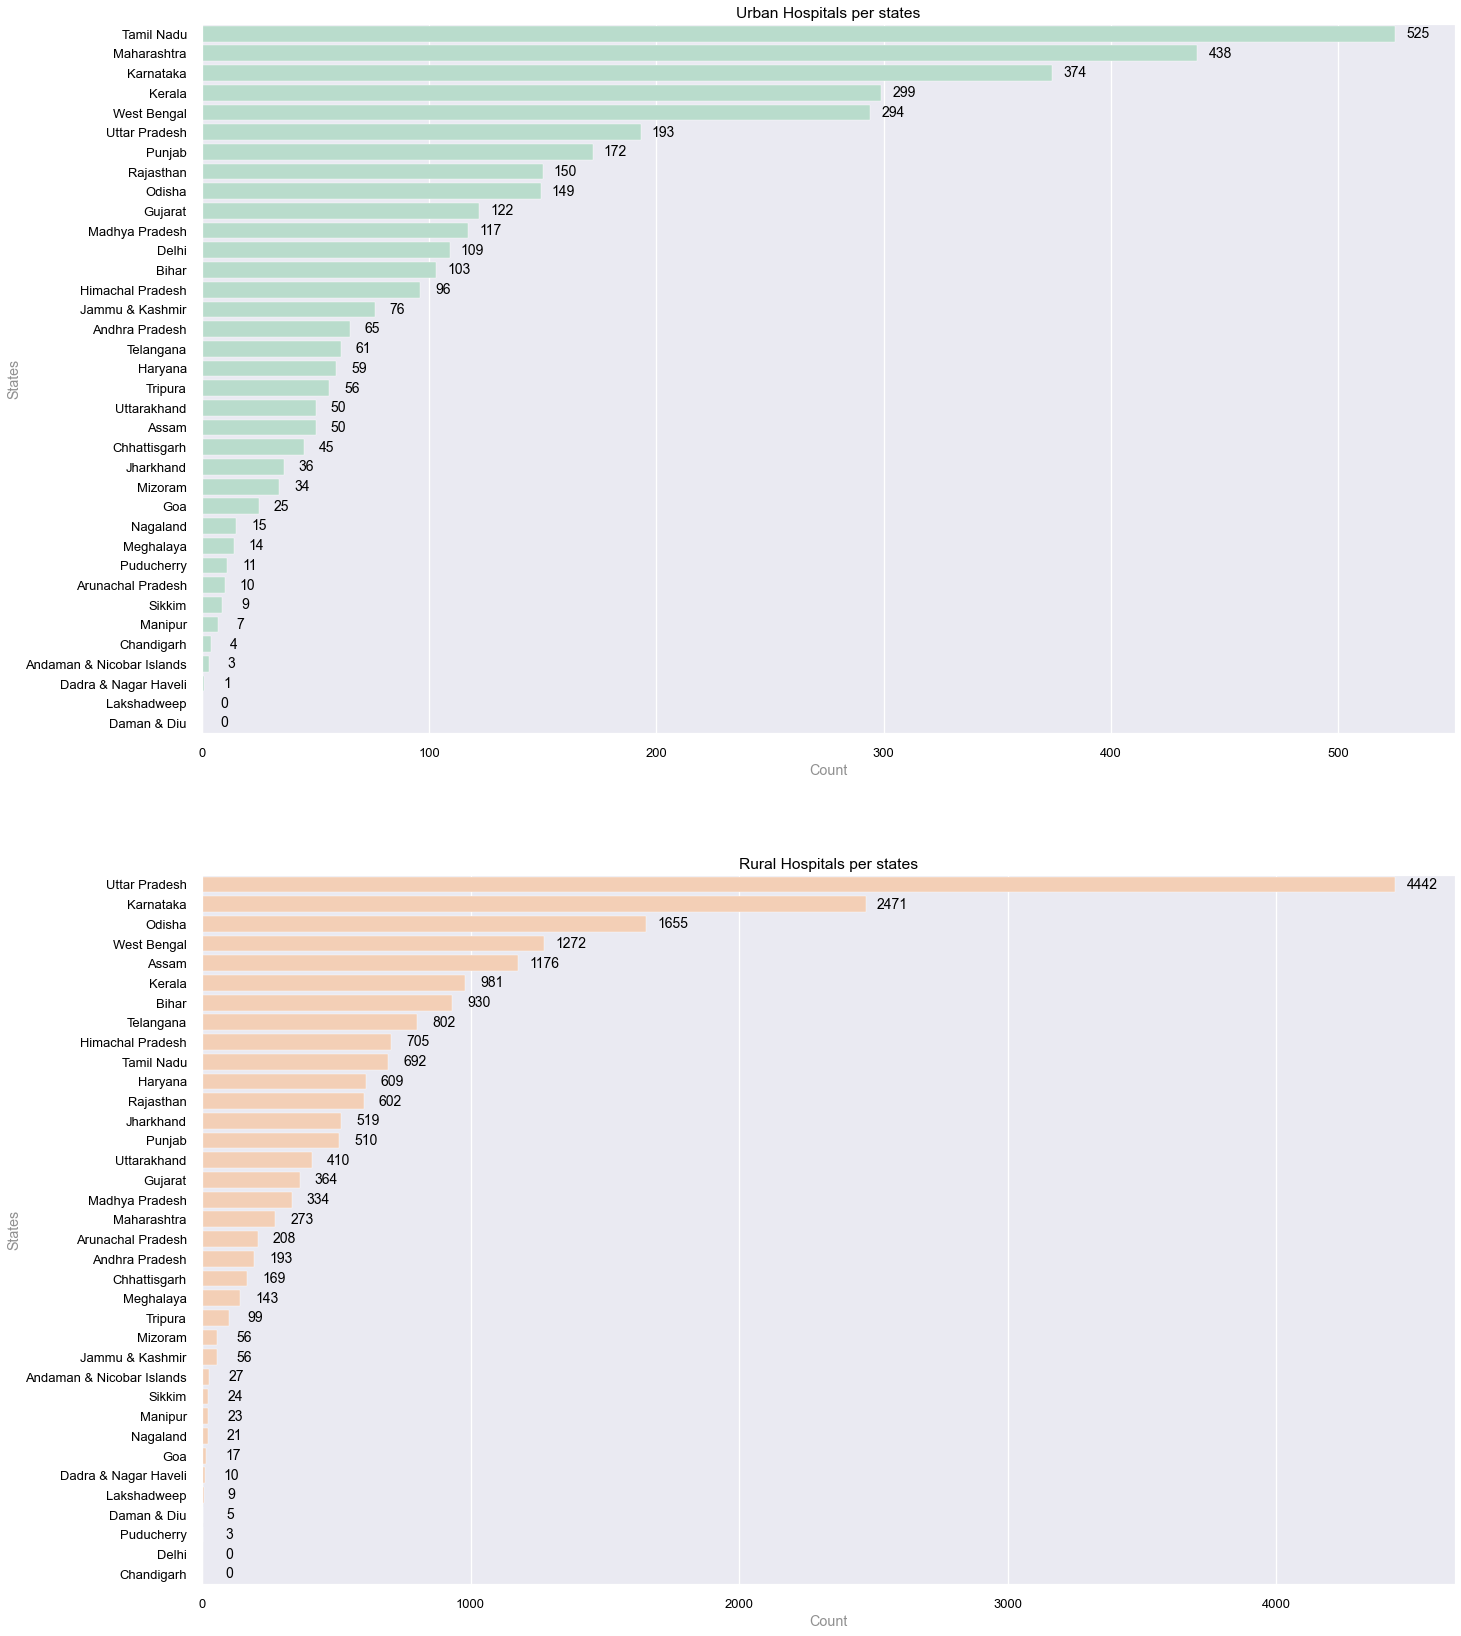

In [58]:
plt.figure(figsize=(20,60))
plt.subplot(4,1,1)
hospitalBedDetails=hospitalBedDetails.sort_values('NumUrbanHospitals_NHP18', ascending= False)
sns.barplot(data=hospitalBedDetails,y='State/UT',x='NumUrbanHospitals_NHP18',color=sns.color_palette('Pastel2')[0])
plt.title('Urban Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospitalBedDetails.shape[0]):
    count = hospitalBedDetails.iloc[i]['NumUrbanHospitals_NHP18']
    plt.text(count+10,i,count,ha='center',va='center')

plt.subplot(4,1,2)
hospitalBedDetails=hospitalBedDetails.sort_values('NumRuralHospitals_NHP18', ascending= False)
sns.barplot(data=hospitalBedDetails,y='State/UT',x='NumRuralHospitals_NHP18',color=sns.color_palette('Pastel2')[1])
plt.title('Rural Hospitals per states')
plt.xlabel('Count')
plt.ylabel('States')
for i in range(hospitalBedDetails.shape[0]):
    count = hospitalBedDetails.iloc[i]['NumRuralHospitals_NHP18']
    plt.text(count+100,i,count,ha='center',va='center')



In [62]:
fig = go.Figure(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumPrimaryHealthCenters_HMIS"], name = "NumberOfPrimaryHealthCenters"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumCommunityHealthCenters_HMIS"], name = "NumberOfCommunityHealthCenters"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumSubDistrictHospitals_HMIS"], name = "NumberOfSubDistrictHealthCenters"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumDistrictHospitals_HMIS"], name = "NumberOfDistrictHealthCenters"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["TotalPublicHealthFacilities_HMIS"], name = "TotalPublicHealthFacilities"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumPublicBeds_HMIS"], name = "NumberOfPubicBeds"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumRuralHospitals_NHP18"], name="NumberRuralHospitals"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumUrbanHospitals_NHP18"], name="NumberUrbanHospitals"))
fig.add_trace(go.Bar(x = hospitalBedDetails["State/UT"], y = hospitalBedDetails["NumUrbanBeds_NHP18"], name="NumberOfUrbanBeds"))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

In [115]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
# df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [116]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)

In [117]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]
# df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

In [120]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)


df_countries_cases.fillna(0,inplace=True)


In [ ]:
CONFIRMED CASES - HEAT MAP

In [122]:
temp_df = pd.DataFrame(df_countries_cases['Confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Confirmed"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="Blues")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()

In [ ]:
DEATH CASES - HEAT MAP

In [123]:
temp_df = pd.DataFrame(df_countries_cases['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Deaths"]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Deaths Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Deaths (Log Scale)",colorscale="Reds")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

In [ ]:
RECOVERED CASES - HEAT MAP

In [124]:
temp_df = pd.DataFrame(df_countries_cases['Recovered'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df.iloc[:,-1]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Recovered"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Recovered Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Recovered",colorscale="Greens")
# fig.to_image("Global Heat Map deaths.png")
fig.show()